# LAB 3 _ PT2

#1. Importando arquivos do Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importando módulos 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from PIL import Image
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras import utils as np_utils
print('Done')

Done


#Verificando GPU

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!nvidia-smi

Fri Jun 25 23:40:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Definindo algumas variáveis
(número de classes, épocas, tamanho dos batch, **arquivos de entrada**...)

In [ ]:
####### Google Drive
drive_path = '/content/drive/My Drive/Colab Notebooks/bases_lab3/base_augmented_64/'

## Classes
num_classes = 12

## Batch Size
batch_size = 64

## Epochs
n_epochs = 106

####### Input Image Dimension
img_rows, img_cols = 64, 64

#Input Shape
input_shape = (img_rows, img_cols, 1)

print('Done')

Done


#Carregando arquivos da base

In [ ]:
x_train_a =  drive_path + 'x_train.npy'
x_test_a = drive_path + 'x_test.npy'
y_train_a = drive_path + 'y_train.npy'
y_test_a = drive_path + 'y_test.npy'
label_a = drive_path + 'label.npy'
x_train = np.load(x_train_a)
x_test = np.load(x_test_a)
y_train = np.load(y_train_a)
y_test = np.load(y_test_a)
label = np.load(label_a)
print('Done')

Done


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4734, 64, 64, 1)
(401, 64, 64, 1)
(4734, 12)
(401, 12)


# **2. Definindo o modelo da CNN**

In [ ]:
## Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))##########camada adicional de dropout*********************
model.add(Conv2D(64, (3, 3), activation='relu'))##########camada adicional
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))##########camada adicional
model.add(Dropout(0.25))
model.add(Flatten())    ########vetor de caracteristicas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Print CNN layers
print ('Network structure ----------------------------------')

#for i, layer in enumerate(model.layers):
#     print(i,layer.name)
#     if hasattr(layer, 'output_shape'):
#         print(layer.output_shape)

model.summary()

print ('----------------------------------------------------')

Network structure ----------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
dro

# **3. Configurando e treinando a CNN**

In [ ]:
## Configures the model for training
model.compile(metrics=['accuracy'], loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.003))

## Trains the model
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, shuffle=True, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print ('\n----------------------------------------------------\n')
print ('Test loss:', score[0])
print ('Test accuracy:', score[1])
print ('\n----------------------------------------------------\n')

## Classes predicted
#print (model.predict_classes(x_test)) 

## Classes probability
#print (model.predict_proba(x_test)) 


Epoch 1/106
74/74 [==============================] - 19s 52ms/step - loss: 2.4858 - accuracy: 0.1092 - val_loss: 2.4681 - val_accuracy: 0.1421
Epoch 2/106
74/74 [==============================] - 3s 35ms/step - loss: 2.4599 - accuracy: 0.1279 - val_loss: 2.4360 - val_accuracy: 0.1646
Epoch 3/106
74/74 [==============================] - 3s 36ms/step - loss: 2.4098 - accuracy: 0.1544 - val_loss: 2.3495 - val_accuracy: 0.2843
Epoch 4/106
74/74 [==============================] - 3s 35ms/step - loss: 2.2953 - accuracy: 0.1952 - val_loss: 2.2085 - val_accuracy: 0.3591
Epoch 5/106
74/74 [==============================] - 3s 35ms/step - loss: 2.1923 - accuracy: 0.2264 - val_loss: 2.1048 - val_accuracy: 0.3766
Epoch 6/106
74/74 [==============================] - 3s 35ms/step - loss: 2.1067 - accuracy: 0.2597 - val_loss: 2.0124 - val_accuracy: 0.3416
Epoch 7/106
74/74 [==============================] - 3s 35ms/step - loss: 1.9913 - accuracy: 0.2993 - val_loss: 1.8594 - val_accuracy: 0.4489
Epoch

# Matriz de confusão

In [ ]:
pred = []
y_pred = model.predict_classes(x_test)
# y_pred = y_prob.argmax(axis=-1)
for i in range(len(x_test)):
	pred.append(y_pred[i])
print (confusion_matrix(label, pred))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[31  4  0  0  0  1  1  2  0  0  0  0]
 [ 5 26  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 35  0  1  0  0  0  0  0  0  0]
 [ 1  0  0 34  0  1  0  0  3  0  0  0]
 [ 0  0  0  9 28  0  0  0  0  0  1  0]
 [ 3  0  0  0  0 21  3  2  0  0  0  0]
 [ 1  0  0  0  2  4 25  0  0  0  0  0]
 [ 0  0  0  0  1  1  0 24  0  0  1  1]
 [ 0  0  0  1  0  0  0  0 25  2  1  2]
 [ 0  0  0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0  1  0 31  0]
 [ 1  1  0  0  0  0  0  1  5  0  5 20]]


# Plotando gráficos

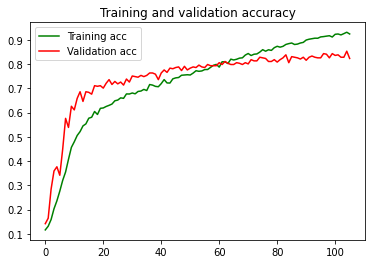

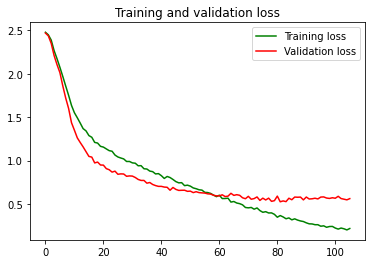

In [ ]:
acc = history.history['accuracy'] # history['acc'] / history['accuracy']
val_acc = history.history['val_accuracy'] # history['val_acc'] / history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()